## Stationarity and Non-stationarity In Time-series 

### Stationary Time Series Data
The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

### Non-Stationary Time Series
Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
series = pd.read_csv('daily-min-temperatures.csv', index_col=0, parse_dates=True)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Plot the timeseries 

Text(0, 0.5, 'Min Temp')

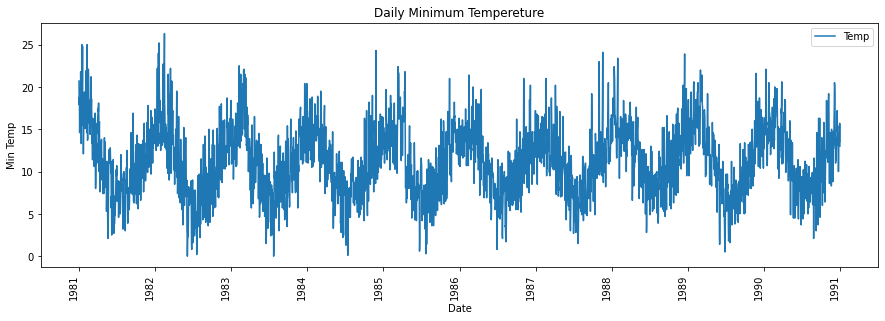

In [3]:
series.plot(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Daily Minimum Tempereture")
plt.ylabel('Min Temp')

### Libraries critical for Time-series Analysis

In [4]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

Investgating stationarity

In [5]:
X = series.values
len(X)

3650

In [6]:
X1, X2 = X[0:1825], X[1825:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.3f, mean2=%.3f' % (mean1, mean2))
print('variance1=%.3f, variance2=%.3f' % (var1, var2))

mean1=11.044, mean2=11.312
variance1=18.161, variance2=14.954


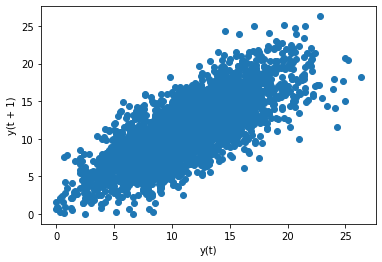

In [7]:
lag_plot(series)
plt.show()

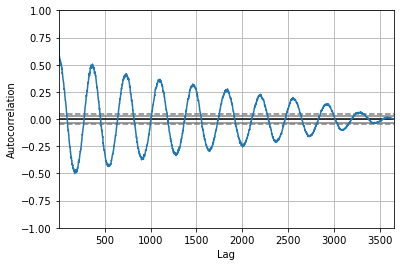

In [8]:
autocorrelation_plot(series)
plt.show()

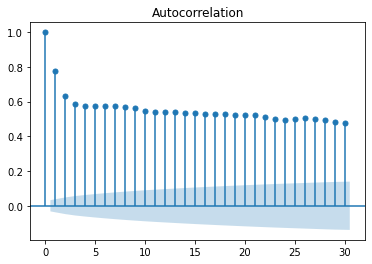

In [9]:
plot_acf(series, lags=30)
plt.show()

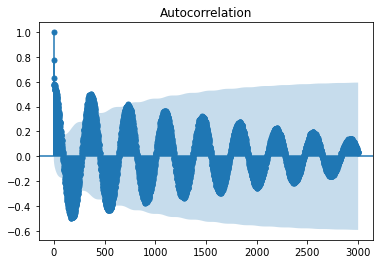

In [10]:
plot_acf(series, lags=3000)
plt.show()

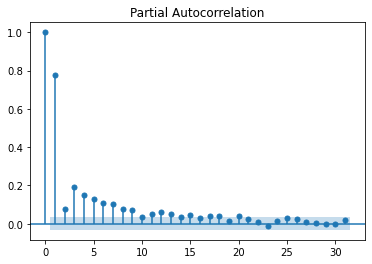

In [11]:
plot_pacf(series, lags=31)
plt.show()

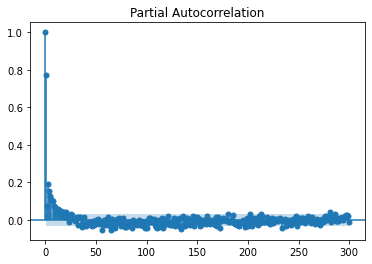

In [12]:
plot_pacf(series, lags=300)
plt.show()

### Augmented Dickey-Fuller test
Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

#### Hypothesis Testing 

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

##### Null Hypothesis 
H0: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
##### Alternate Hypothesis 
H1: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.  

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [13]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.444805
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


#### Determining stationarity in AirPassenger dataset

In [14]:
series1 = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=True)
series1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

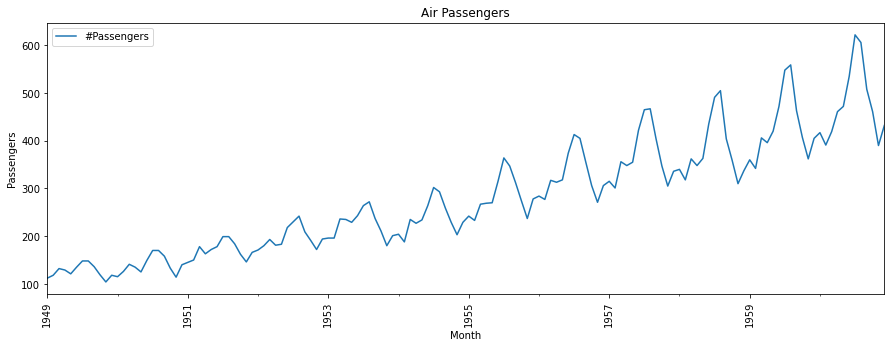

In [15]:
series1.plot(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Air Passengers")
plt.ylabel('Passengers')

In [16]:
X1 = series1.values
len(X1)

144

In [17]:
X_1, X_2 = X1[0:72], X1[72:]
mean1, mean2 = X_1.mean(), X_2.mean()
var1, var2 = X_1.var(), X_2.var()
print('mean1=%.3f, mean2=%.3f' % (mean1, mean2))
print('variance1=%.3f, variance2=%.3f' % (var1, var2))

mean1=182.903, mean2=377.694
variance1=2244.088, variance2=7367.962


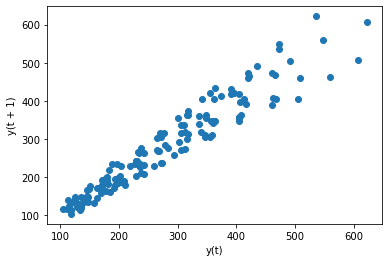

In [18]:
lag_plot(series1)
plt.show()

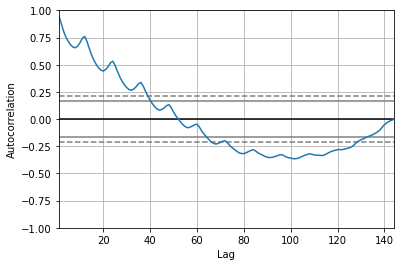

In [19]:
autocorrelation_plot(series1)
plt.show()

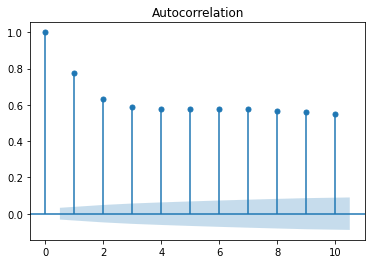

In [20]:
plot_acf(series, lags=10)
plt.show()

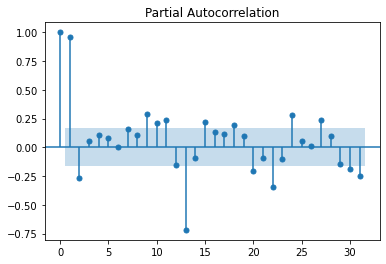

In [21]:
plot_pacf(series1, lags=31)
plt.show()

In [22]:
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [23]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
print ('Results of KPSS Test:')
kpsstest = kpss(series1)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

Results of KPSS Test:
Test Statistic           1.052175
p-value                  0.010000
Lags Used               14.000000
Critical Value (10%)     0.347000
dtype: float64
Test Statistic           1.052175
p-value                  0.010000
Lags Used               14.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
dtype: float64
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\ALVIS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


#### Differentiate to make stationary. 

<AxesSubplot:xlabel='Month'>

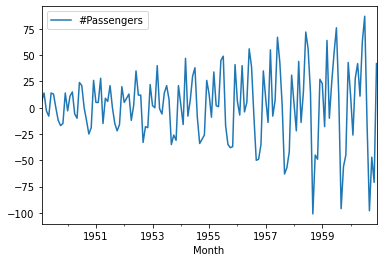

In [24]:
series1_1 = series1.diff(1)
series1_1 = series1_1.dropna()
series1_1.plot()

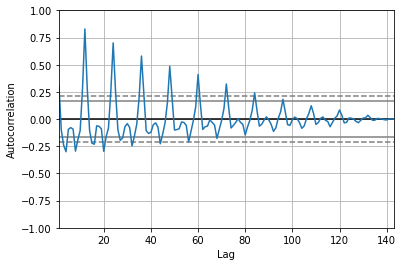

In [25]:
autocorrelation_plot(series1_1)
plt.show()

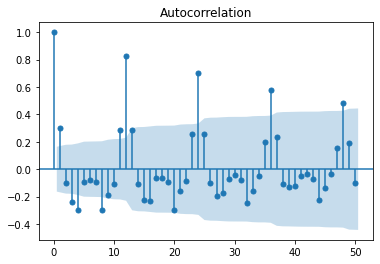

In [26]:
plot_acf(series1_1, lags=50)
plt.show()

In [27]:
result = adfuller(series1_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


<AxesSubplot:xlabel='Month'>

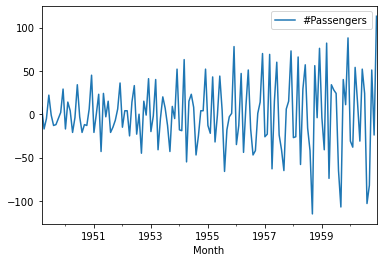

In [28]:
series1_2 = series1_1.diff(1)
series1_2 = series1_2.dropna()
series1_2.plot()

In [29]:
result = adfuller(series1_2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
